"Dataset website: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data"

In [1]:
import pandas as pd

df = pd.read_csv("E:/curriculum/Customer Churn/data/customer_churn.csv")

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


"We preprocessed the dataset, changed yes and no to 1 and 0, blank spaces to nan, and performed one-hot encoding on columns with more than two values."

In [5]:
import numpy as np
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df = df.drop('customerID', axis = 'columns')
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].replace({'Male': 1, 'Female':0})
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = df["TotalCharges"].astype(float)
df = df.dropna()
df = df.reset_index(drop=True)


one_hot_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=one_hot_cols)

dummy_cols = df.select_dtypes(include='bool').columns
df[dummy_cols] = df[dummy_cols].astype(int)

df.head()


C:\Users\adria\AppData\Local\Temp\ipykernel_13904\3150483577.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})
C:\Users\adria\AppData\Local\Temp\ipykernel_13904\3150483577.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female':0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


"We performed the test and train partitions and tried to perform a first test with logisticRegression."

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

modelL = LogisticRegression(max_iter=10000, class_weight="balanced")
modelL.fit(X_train, y_train)

y_pred = modelL.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7313432835820896
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



"We repeat the process with other classifiers such as RandomForest, XGBC, and SVC."

In [7]:
from sklearn.ensemble import RandomForestClassifier

modelF = RandomForestClassifier(100,random_state=42, class_weight='balanced')
modelF.fit(X_train, y_train)

y_probs = modelF.predict_proba(X_test)[:, 1]  # prob. de clase 1
threshold = 0.45  # más bajo que 0.5
y_pred = (y_probs >= threshold).astype(int)


print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7782515991471215
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.54      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



In [8]:
from xgboost import XGBClassifier

modelXGCB = XGBClassifier(
    n_stimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])
    )

modelXGCB.fit(X_train, y_train)
y_pred= modelXGCB.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy:  0.7277896233120114
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1033
           1       0.49      0.75      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.78      0.73      0.74      1407



C:\Users\adria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [12:11:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_stimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

modelSVC =  Pipeline([
    ("scaler",StandardScaler()),
    ("svc", SVC(class_weight="balanced", probability=True, random_state=42))
])

modelSVC.fit(X_train, y_train)
y_pred = modelSVC.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy:  0.7334754797441365
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1033
           1       0.50      0.76      0.60       374

    accuracy                           0.73      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.79      0.73      0.75      1407



"Once we have the models, we create a table and a graph to observe the best models."

"Looking at the results, we can see that the best model is logistic regression, but that it is not as accurate as we would like when determining when a customer will churn."

In [10]:
from sklearn.metrics import classification_report, roc_auc_score

models = {    
    "Logistic Regression": modelL,
    "Random Forest": modelF,
    "XGBoost": modelXGCB,
    "SVC": modelSVC
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

    results.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Recall Class 1": report["1"]["recall"],
        "Precision Class 1": report["1"]["precision"],
        "F1 Class 1": report["1"]["f1-score"],
        "ROC AUC": auc
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="F1 Class 1", ascending=False)

print(df_results.to_string(index=False))

              Model  Accuracy  Recall Class 1  Precision Class 1  F1 Class 1  ROC AUC
Logistic Regression  0.731343        0.791444           0.496644    0.610309 0.831696
                SVC  0.733475        0.762032           0.499124    0.603175 0.807194
            XGBoost  0.727790        0.751337           0.492119    0.594709 0.826761
      Random Forest  0.783227        0.473262           0.621053    0.537178 0.816212


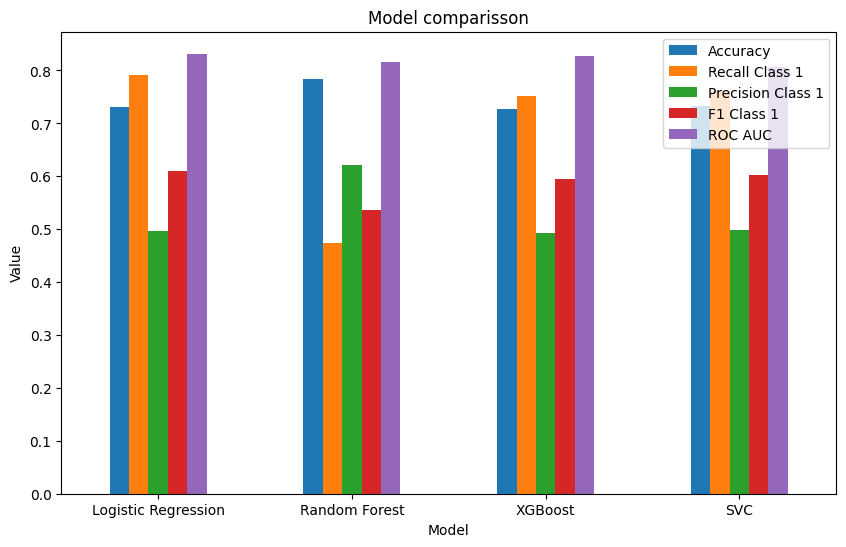

In [11]:
import matplotlib.pyplot as plt

df_results = pd.DataFrame(results)
df_results.set_index("Model", inplace=True)

ax = df_results.plot.bar(rot=0, figsize=(10,6))
plt.title("Model comparisson")
plt.ylabel("Value")
plt.show()


"This lack of precision seems to be due to a lack of data in the dataset of customers who churn, so we will now try to train the classifiers using SMOTE to smooth out this imbalance"

In [12]:
df['Churn'].value_counts(normalize=True) * 100

Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

In [13]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  

logisticSmoteModel = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),  
    ('clf', LogisticRegression(random_state=42))
])


logisticSmoteModel.fit(X_train, y_train)
y_pred = logisticSmoteModel.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7370291400142146
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  

randomForestSmoteModel = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),  
    ('radomForest', RandomForestClassifier(100,random_state=42))
])


randomForestSmoteModel.fit(X_train, y_train)
y_pred = randomForestSmoteModel.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7761194029850746
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1033
           1       0.58      0.58      0.58       374

    accuracy                           0.78      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [15]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  

svcSmoteModel = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),  
    ("svc", SVC(probability=True, random_state=42))
])


svcSmoteModel.fit(X_train, y_train)
y_pred = svcSmoteModel.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.757640369580668
              precision    recall  f1-score   support

           0       0.88      0.78      0.82      1033
           1       0.53      0.71      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407



In [16]:
xcgbSmoteModel = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),  
    ("svc", XGBClassifier(
    n_stimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])
    ))
])

xcgbSmoteModel.fit(X_train, y_train)
y_pred= xcgbSmoteModel.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7100213219616205
              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1033
           1       0.47      0.80      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.73      1407



C:\Users\adria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [12:11:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_stimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


"Once we have all the classifiers with Smote, we will determine the best ones again using the data table and various graphs."

"We can see that SMOTE improves the results slightly, but not significantly, with LogisticRegression with SMOTE being one of the classifiers that gives the best values."

In [17]:
from sklearn.metrics import classification_report, roc_auc_score

models = {    
    "Logistic Regression": modelL,
    "Random Forest": modelF,
    "XGBoost": modelXGCB,
    "SVC": modelSVC,
    "Logistic Regression SMOTE": logisticSmoteModel,
    "Random Forest SMOTE": randomForestSmoteModel,
    "SVC SMOTE": svcSmoteModel,
    "XGB SOMTE": xcgbSmoteModel
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

    results.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Recall Class 1": report["1"]["recall"],
        "Precision Class 1": report["1"]["precision"],
        "F1 Class 1": report["1"]["f1-score"],
        "ROC AUC": auc
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="F1 Class 1", ascending=False)

print(df_results.to_string(index=False))


                    Model  Accuracy  Recall Class 1  Precision Class 1  F1 Class 1  ROC AUC
Logistic Regression SMOTE  0.737029        0.794118           0.503390    0.616183 0.832219
      Logistic Regression  0.731343        0.791444           0.496644    0.610309 0.831696
                SVC SMOTE  0.757640        0.708556           0.533199    0.608496 0.804669
                      SVC  0.733475        0.762032           0.499124    0.603175 0.807194
                  XGBoost  0.727790        0.751337           0.492119    0.594709 0.826761
                XGB SOMTE  0.710021        0.799465           0.473101    0.594433 0.823505
      Random Forest SMOTE  0.776119        0.582888           0.578249    0.580559 0.809806
            Random Forest  0.783227        0.473262           0.621053    0.537178 0.816212


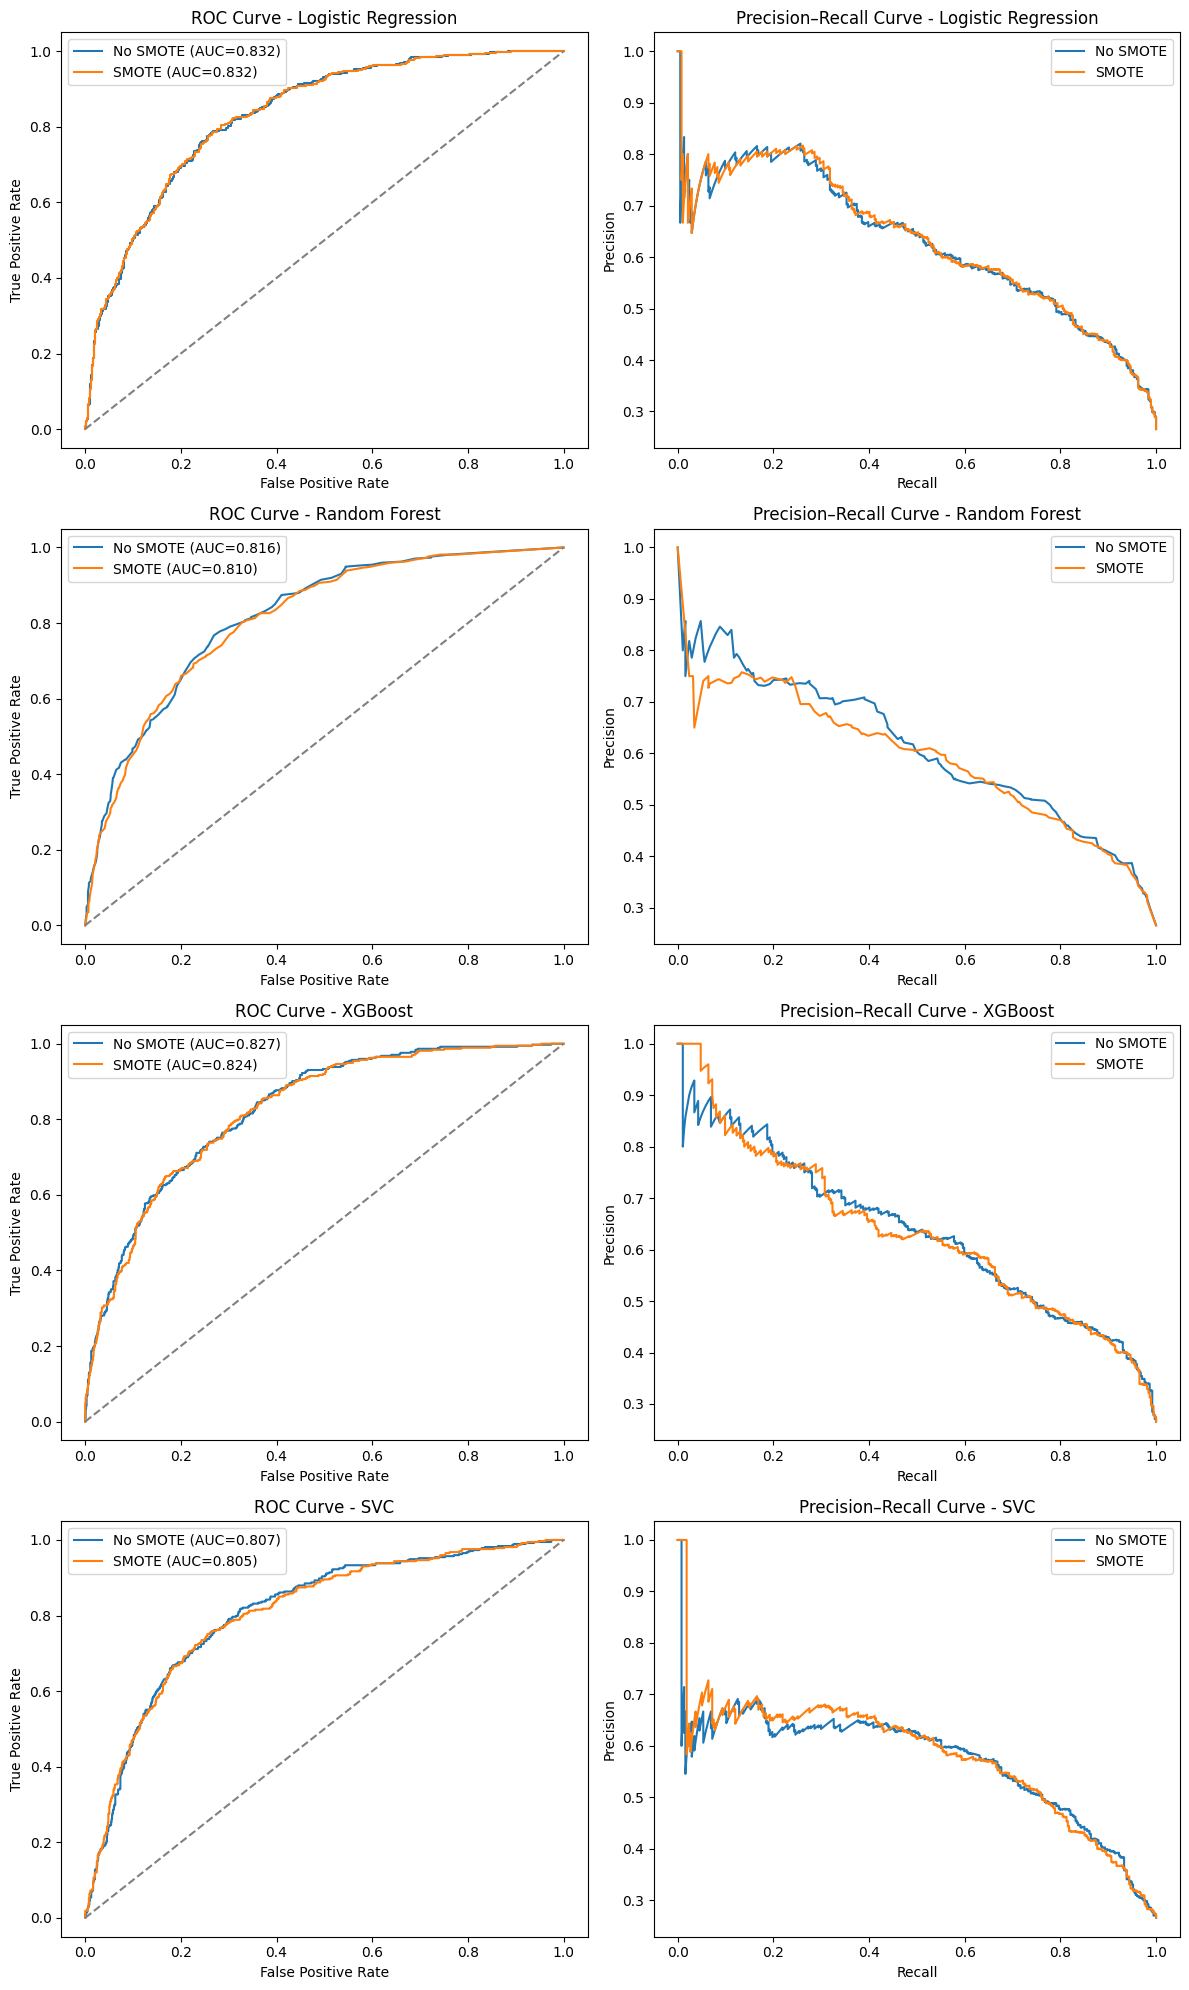

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def plot_comparison(y_test, results):
    """
    results: dict
        {
            "Logistic Regression": (y_proba_no, y_proba_smote),
            "SVC": (y_proba_no, y_proba_smote),
            ...
        }
    """
    n_models = len(results)
    plt.figure(figsize=(12, 5*n_models))

    for i, (model_name, (y_proba_no, y_proba_smote)) in enumerate(results.items(), 1):
        # ROC
        fpr1, tpr1, _ = roc_curve(y_test, y_proba_no)
        roc_auc1 = auc(fpr1, tpr1)
        fpr2, tpr2, _ = roc_curve(y_test, y_proba_smote)
        roc_auc2 = auc(fpr2, tpr2)

        plt.subplot(n_models, 2, 2*i-1)
        plt.plot(fpr1, tpr1, label=f'No SMOTE (AUC={roc_auc1:.3f})')
        plt.plot(fpr2, tpr2, label=f'SMOTE (AUC={roc_auc2:.3f})')
        plt.plot([0,1],[0,1],'--',color='gray')
        plt.title(f'ROC Curve - {model_name}')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()

        # Precision-Recall
        prec1, rec1, _ = precision_recall_curve(y_test, y_proba_no)
        prec2, rec2, _ = precision_recall_curve(y_test, y_proba_smote)

        plt.subplot(n_models, 2, 2*i)
        plt.plot(rec1, prec1, label='No SMOTE')
        plt.plot(rec2, prec2, label='SMOTE')
        plt.title(f'Precision–Recall Curve - {model_name}')
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.legend()

    plt.tight_layout()
    plt.show()


results = {
    "Logistic Regression": (
        modelL.predict_proba(X_test)[:,1],
        logisticSmoteModel.predict_proba(X_test)[:,1]
    ),
    "Random Forest": (
        modelF.predict_proba(X_test)[:,1],
        randomForestSmoteModel.predict_proba(X_test)[:,1]
    ),
    "XGBoost": (
        modelXGCB.predict_proba(X_test)[:,1],
        xcgbSmoteModel.predict_proba(X_test)[:,1]
    ),
    # Si tu SVC es con probability=True
    "SVC": (
        modelSVC.predict_proba(X_test)[:,1],
        svcSmoteModel.predict_proba(X_test)[:,1]
    )
}

plot_comparison(y_test, results)


"We are going to run tests with different hyperparameters to try to further refine the values obtained."

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd



param_grids = {
    "LogisticRegression": {
        "clf": [LogisticRegression(max_iter=500, random_state=42)],
        "clf__C": [0.01, 0.1, 1, 10],
        "clf__penalty": ["l2"]
    },
    "SVC": {
        "clf": [SVC(probability=True, random_state=42)],
        "clf__C": [0.1, 1, 10],
        "clf__kernel": ["linear", "rbf"]
    },
    "RandomForest": {
        "clf": [RandomForestClassifier(random_state=42)],
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [None, 5, 10]
    },
    "XGB": {
        "clf": [XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)],
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [3, 5, 7],
        "clf__learning_rate": [0.01, 0.1]
    }
}

best_models = {}
results = []

for model_name, grid in param_grids.items():
    print(f"Training {model_name}...")

    pipeline = ImbPipeline([
        ("scaler", StandardScaler()),
        ("smote", SMOTE(random_state=42)),
        ("clf", grid["clf"][0])  
    ])

    search = GridSearchCV(
        pipeline,
        param_grid=grid,
        scoring="f1",   
        cv=5,
        n_jobs=-1
    )
    search.fit(X_train, y_train)

    best_models[model_name] = search.best_estimator_

    y_pred = search.predict(X_test)
    results.append({
        "Model": model_name,
        "Best Params": search.best_params_,
        "Best CV Score": search.best_score_,
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Test Recall": recall_score(y_test, y_pred),
        "Test Precision": precision_score(y_test, y_pred),
        "Test F1": f1_score(y_test, y_pred),
        "Test ROC AUC": roc_auc_score(y_test, search.predict_proba(X_test)[:,1])
    })



Training LogisticRegression...
Training SVC...


"Finally, we can conclude that one of the best models remains LogisticRegression with SMOTE."

In [ ]:
import pickle

df_results = pd.DataFrame(results)
df_results.sort_values(by="Test F1", ascending=False, inplace=True)
display(df_results.head(3))

best_row = df_results.iloc[0]
best_model_name = best_row["Model"]
best_model = best_models[best_model_name]

with open('../models/best_model.pickle', 'wb') as f:
    pickle.dump(best_model,f)

print(f"\nBest Model: {best_model_name}")
print(f"Hiperparams: {best_row['Best Params']}")


,Model,Best Params,Best CV Score,Test Accuracy,Test Recall,Test Precision,Test F1,Test ROC AUC
0,LogisticRegression,"{'clf': LogisticRegression(max_iter=500, rando...",0.633183,0.739161,0.791444,0.505983,0.617310,0.831825
1,SVC,"{'clf': SVC(probability=True, random_state=42)...",0.623465,0.757640,0.708556,0.533199,0.608496,0.804669
2,RandomForest,{'clf': RandomForestClassifier(random_state=42...,0.632631,0.730633,0.772727,0.495712,0.603971,0.826158



Best Model: LogisticRegression
Hiperparams: {'clf': LogisticRegression(max_iter=500, random_state=42), 'clf__C': 0.1, 'clf__penalty': 'l2'}
